<a href="https://colab.research.google.com/github/Chapa0000/DS3/blob/main/PF_DS3_JRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA SCIENCE III
NLP Y DEEP LEARNING

JORGE DAMIAN RODRIGUEZ

COMISION 61195

NLP

Mediante un dataset de canciones de los Beatles se estudiara el proceso para transformar el mismo a lenguaje natural y poder explorarlo.

In [17]:
import pandas as pd

splits = {'dataset_cleaned': 'data/dataset_cleaned-00000-of-00001.parquet', 'dataset_full': 'data/dataset_full-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/koudeheld/beatles_lyrics_dict/" + splits["dataset_cleaned"])

In [18]:
df

,number,title,artist,lyrics,album,lyrics_length
0,1,Come Together,The Beatles,"\nCome together, yeah\nCome together, yeah\nCo...",Abbey Road by The Beatles,241
1,2,Something,The Beatles,\nI don't want to leave her now\nYou know I be...,Abbey Road by The Beatles,139
2,3,Maxwell’s Silver Hammer,The Beatles,\nBang! Bang! Maxwell's silver hammer\nCame do...,Abbey Road by The Beatles,252
3,4,Oh! Darling,The Beatles,"\nOh! Darling, if you leave me\nI'll never mak...",Abbey Road by The Beatles,182
4,5,Octopus’s Garden,The Beatles,\nWe would shout and swim about\nThe coral tha...,Abbey Road by The Beatles,201
...,...,...,...,...,...,...
175,2,Only a Northern Song,The Beatles,\nIf you think the harmony\nIs a little dark a...,Yellow Submarine by The Beatles,133
176,3,All Together Now,The Beatles,\n(Bom bom bom bompa bom) Sail the ship\n(Bomp...,Yellow Submarine by The Beatles,403
177,4,Hey Bulldog,The Beatles,\nBig man (Yeah)\nWalking in the park\nWigwam\...,Yellow Submarine by The Beatles,255
178,5,It’s All Too Much,The Beatles,"\nIt's too much\nAh, it's too much\n\nWith you...",Yellow Submarine by The Beatles,364


Analisis de sentimiento

In [19]:
# Utilizando la columna 'lyrics' quiero determinar si el sentimiento de las palabras contenidas es alegre o triste

from textblob import TextBlob

# Install necessary library
!pip install textblob

# Download the punkt sentence tokenizer (required for TextBlob)
!python -m textblob.download_corpora

splits = {'dataset_cleaned': 'data/dataset_cleaned-00000-of-00001.parquet', 'dataset_full': 'data/dataset_full-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/koudeheld/beatles_lyrics_dict/" + splits["dataset_cleaned"])

# Handle None values before applying get_sentiment
df['lyrics'] = df['lyrics'].fillna('')  # Replace None values with empty strings

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return " alegre"
    elif polarity < -0.1:
        return " triste"
    else:
        return " neutro"

df['sentiment'] = df['lyrics'].apply(get_sentiment)
print(df[['lyrics', 'sentiment']])

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
                                                lyrics sentiment
0    \nCome together, yeah\nCome together, yeah\nCo...    neutro
1    \nI don't want to leave her now\nYou know I be...    neutro
2    \nBang! Bang! Maxwe

In [20]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
neutro    95
alegre    71
triste    14
Name: count, dtype: int64


sentiment
neutro    95
alegre    71
triste    14
Name: count, dtype: int64


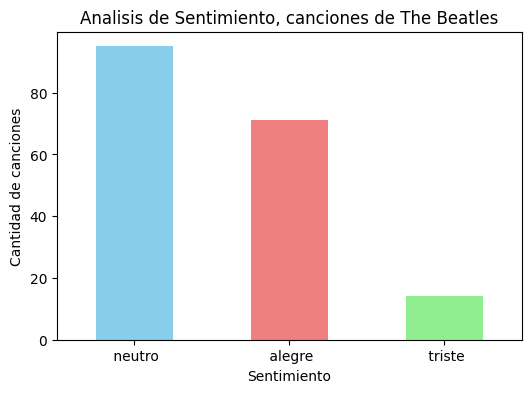

In [30]:
# Realizar un grafico de sentimiento
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Create the bar plot
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Analisis de Sentimiento, canciones de The Beatles')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de canciones')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Bag of Words (Top 10 most frequent): [('yeah', 180), ('oh', 134), ('together', 108), ('want', 70), ('know', 69), ('la', 68), ('come', 66), ('love', 66), ('tit', 64), ('much', 63)]


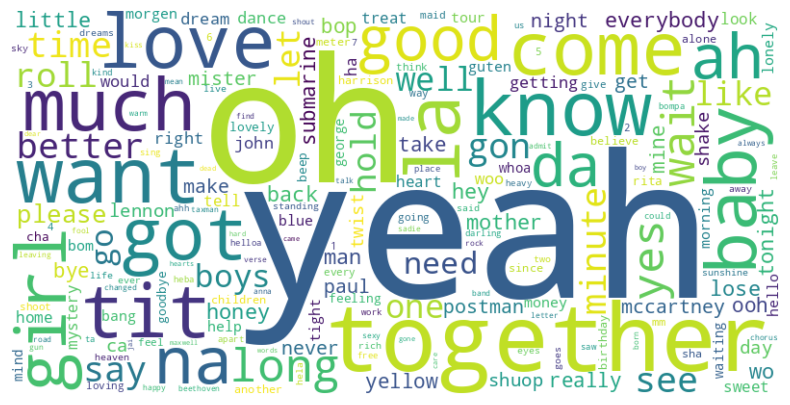

In [14]:
# Sacar las stopwords, hacer una bag of words y un wordcloud

import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Install necessary libraries if not already installed
!pip install textblob nltk wordcloud

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab data

splits = {'dataset_cleaned': 'data/dataset_cleaned-00000-of-00001.parquet', 'dataset_full': 'data/dataset_full-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/koudeheld/beatles_lyrics_dict/" + splits["dataset_cleaned"])

# Handle None values
df['lyrics'] = df['lyrics'].fillna('')

# Function to get sentiment (no changes needed)
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return " alegre"
    elif polarity < -0.1:
        return " triste"
    else:
        return " neutro"

df['sentiment'] = df['lyrics'].apply(get_sentiment)

# Remove stopwords and create bag of words
stop_words = set(stopwords.words('english'))
def process_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [w for w in words if w.isalnum() and w not in stop_words]
    return words

df['processed_lyrics'] = df['lyrics'].apply(process_text)

all_words = [word for lyrics in df['processed_lyrics'] for word in lyrics]
word_counts = Counter(all_words)
print("Bag of Words (Top 10 most frequent):", word_counts.most_common(10))


# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

DEEP LEARNING

Utilizando las letras de sus canciones intente crear un modelo para hacer nuevas.
El resultado estuvo muy alejado de lo pensado, requiere entrenamiento y mejorar los parametros.

In [16]:
# Modelo de deep learning con el cual pueda hecer nuevas canciones basandose en las letras de 'lyrics' de este df

!pip install transformers datasets accelerate

from transformers import pipeline, set_seed

# Load the dataset (assuming df is already loaded as in your previous code)
splits = {'dataset_cleaned': 'data/dataset_cleaned-00000-of-00001.parquet', 'dataset_full': 'data/dataset_full-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/koudeheld/beatles_lyrics_dict/" + splits["dataset_cleaned"])
df['lyrics'] = df['lyrics'].fillna('')

# Prepare the lyrics data
lyrics_data = df['lyrics'].tolist()
lyrics_text = '\n'.join(lyrics_data)


# Use a text generation pipeline
generator = pipeline('text-generation', model='gpt2') # You can experiment with other models like 'gpt2-medium', 'gpt2-large', etc.
set_seed(42) # for reproducibility


# Function to generate new lyrics
def generate_new_lyrics(prompt, num_return_sequences=1, max_length=200):
    generated = generator(prompt, num_return_sequences=num_return_sequences, max_length=max_length)
    return [gen['generated_text'] for gen in generated]


# Generate new lyrics based on a given prompt or starting text
new_lyrics = generate_new_lyrics('Beatles 2024', num_return_sequences=3)


# Print the generated lyrics
for i, lyrics in enumerate(new_lyrics):
  print(f"Generated lyrics {i+1}:\n{lyrics}\n")


# Example of generating lyrics based on the Beatles lyrics dataset itself
prompt_from_dataset = lyrics_data[0][:50]  # Use the first 50 characters of a random song as a starting point
new_lyrics_from_dataset = generate_new_lyrics(prompt_from_dataset, num_return_sequences=2)
for i, lyrics in enumerate(new_lyrics_from_dataset):
    print(f"Generated lyrics based on dataset ({i+1}):\n{lyrics}\n")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generated lyrics 1:
Beatles 2024: Then They Dare Come True Life To Die! 2024: New Horizons Unbound Unbound: Factory of Eternity Sword 2-in-1 bundle Swordbreaker The Game Swords & Crossbones: An Epic Pirate Story Swords and Sorcery - Underworld - DEFINITIVE EDITION SWR JST DX Selective Memory Erase Effect Syberia Syberia 2 Syberia 3 Syder Arcade Sydney's World Sylvio Sym Symphonics Symphonic Rain Symphony Symphony of the Machine Symploké: La Leyenda de Gustavo Bueno (Capítulo 2) Synchrom Syndrome Synonymy Syrian Warfare System Shock 2 System Shock: Enhanced Edition Systematic Immunity sZone-Online T-Kara Puzzles T.E.C. 3001 TableTop Cricket Tabletop Simulator TableTop Soccer Tachyon Project Tacoma Tacopocalypse Tactical Intervention Tactical Soccer The New Season Tactics: Bludgeons Blessing Tadpole Treble Tahira: Echoes of the Astral Empire TAIKER

Generated lyrics 2:
Beatles 2024: The Great Pizza Wars BattleSouls BattleSpace Battlestar Galactica Deadlock BattleStorm Battletank LOBA BAT